# Evaluating Weather Differences Across Latitudes Using Cities Worldwide

### WeatherAPI data using Python, pandas, matplotlib/seaborn, citipy

-------

### There are three sections to this analysis: 
#### 1. data setup (citipy, API call to OpenWeather)
#### 2. graphing and analysis of variable differences across latitude
#### 3. summary findings of each analysis



* Setup environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


* Gather city data

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(city)
    #print to file        
    with open('city_output.txt', 'w') as f:
                f.write('\n'.join(cities))
# Print the city count to confirm sufficient count
print(len(cities))



600


* Prepare and run the api call

In [3]:
from api_keys import api_key

In [4]:
#create df to hold it, start with dict then convert to df

city_weather = {'City':[],
                'Country':[],
                'Cloudiness':[],
                'Date':[],
                'Humidity':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                'Min Temp':[],
                'Pressure':[],
                'Wind Speed':[],
                'Real Feel Temp':[],
                'City ID':[]}

#loop over cities and add data
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

    try:
        req=requests.get(base_url + f'&q={city}') 
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['City'].append(data['name'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Date'].append(data['dt'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Lat'].append(data['coord']['lat'])
        city_weather['Lng'].append(data['coord']['lon'])
        city_weather['Max Temp'].append(data['main']['temp_max'])
        city_weather['Min Temp'].append(data['main']['temp_min'])
        city_weather['Pressure'].append(data['main']['pressure'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        city_weather['Real Feel Temp'].append(data['main']['feels_like'])
        city_weather['City ID'].append(data['id'])
        
        print("processing " + city + " " + city_weather['City ID'])
        
    except:
        print(city + " "+ city_weather['City ID'] + " not found")
        pass  #continue on to the next part of loop
    


processing kapaa
processing cruz alta
processing hasaki
processing coos bay
processing mataura
processing vaini
processing roald
processing alofi
duz not found
processing puerto ayora
taolanaro not found
processing punta arenas
processing cape town
processing tongren
processing afyonkarahisar
processing rikitea
processing bluff
processing busselton
processing qaanaaq
processing vao
processing antofagasta
processing faanui
processing san joaquin
rungata not found
processing marsa matruh
processing jamestown
processing puerto gaitan
processing bone
processing san vicente
processing hermanus
belushya guba not found
processing chokurdakh
processing lahij
amderma not found
processing berlevag
processing una
processing notre-dame-du-lac
processing albany
nizhneyansk not found
processing maryville
processing lebu
processing arlit
processing port alfred
processing pucallpa
processing ushuaia
processing narsaq
processing gimli
processing paamiut
processing pokhara
processing alta floresta
proce

processing dvinskoy
processing thap than
processing port hedland
processing burevestnik
processing flinders
processing san patricio
processing spirovo
processing katsuura
processing cleburne
processing cockburn town
processing maragogi
processing inhambane
processing bridlington
processing leon valley
processing hamilton
processing providencia
processing misratah
processing shubarkuduk
processing huarmey
processing palmer
processing coquimbo
processing drumheller
processing havre-saint-pierre
processing inyonga
processing lincoln
processing aktanysh
processing milas
processing farafangana
processing pinawa
processing gat
processing tupik
processing mackenzie
processing tiarei
processing mount vernon
processing lucapa
processing hay river
gilazi not found
processing ajdabiya
processing beloha
maghama not found
processing nerchinskiy zavod
processing ippy
processing morant bay
processing svetlyy
processing rennes
processing porto santo
processing noumea
processing kalmunai
processing uru

In [ ]:
print(city_weather)

* Get output into pandas dataframe

In [8]:
city_weather_df = pd.DataFrame.from_dict(city_weather)
print(city_weather_df)


                      City Country  Cloudiness        Date  Humidity      Lat  \
0                    Kapaa      US          40  1634696845        69  22.0752   
1                Cruz Alta      BR           0  1634696849        86 -28.6386   
2                   Hasaki      JP          13  1634696851        58  35.7333   
3                 Coos Bay      US          90  1634696784        92  43.3665   
4                  Mataura      NZ          15  1634696855        38 -46.1927   
5                    Vaini      TO          40  1634696857        50 -21.2000   
6                    Roald      NO          90  1634696859        93  62.5833   
7                    Alofi      NU          11  1634696862        57 -19.0595   
8             Puerto Ayora      EC          75  1634696867        88  -0.7393   
9             Punta Arenas      CL           0  1634696871        71 -53.1500   
10               Cape Town      ZA           0  1634696810        74 -33.9258   
11                 Tongren  

* Output dataframe to csv file

In [9]:
#print dataframe to csv file
city_weather_df.to_csv(r'city_weather.csv')

* Added 'hemisphere' data column to dataframe for additional analysis

In [10]:
#add hemisphere column            
city_weather_df["Hemisphere"] = ["Northern" if x>=0 else "Southern" for x in city_weather_df["Lat"]]

* Added 'region' data column to dataframe for additional analysis

In [11]:
#adding regional categories

regional = []

for lat in city_weather_df["Lat"]:
    if (lat>0 and lat<=10) or (lat<0 and lat>=-10):
        regional.append("Equatorial")
    elif  (lat>10 and lat<=30) or (lat<-10 and lat>=-30):
        regional.append("Subtropical")
    elif  (lat>30 and lat<=60) or (lat<-30 and lat>=-60):
        regional.append("Subpolar")
    else:
        regional.append("Polar")

regional_df = pd.DataFrame(regional)

city_weather_df2=pd.concat([city_weather_df,regional_df],axis=1)
city_weather_df3=pd.DataFrame(city_weather_df2).rename(columns={0: "Region"})
city_weather_df3

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Min Temp,Pressure,Wind Speed,Real Feel Temp,City ID,Hemisphere,Region
0,Kapaa,US,40,1634696845,69,22.0752,-159.3190,82.38,79.12,1018,5.01,79.29,5848280,Northern,Subtropical
1,Cruz Alta,BR,0,1634696849,86,-28.6386,-53.6064,55.38,55.38,1022,9.08,54.66,3465108,Southern,Subtropical
2,Hasaki,JP,13,1634696851,58,35.7333,140.8333,70.29,68.29,1006,12.37,68.18,2112802,Northern,Subpolar
3,Coos Bay,US,90,1634696784,92,43.3665,-124.2179,55.38,52.93,1003,0.00,53.37,5720495,Northern,Subpolar
4,Mataura,NZ,15,1634696855,38,-46.1927,168.8643,59.29,59.29,1028,3.83,56.70,6201424,Southern,Subpolar
5,Vaini,TO,40,1634696857,50,-21.2000,-175.2000,78.96,78.96,1019,10.36,78.96,4032243,Southern,Subtropical
6,Roald,NO,90,1634696859,93,62.5833,6.1333,53.33,48.99,980,8.05,49.98,3141667,Northern,Polar
7,Alofi,NU,11,1634696862,57,-19.0595,-169.9187,78.69,78.69,1016,14.97,78.94,4036284,Southern,Subtropical
8,Puerto Ayora,EC,75,1634696867,88,-0.7393,-90.3518,70.02,70.02,1015,7.65,70.86,3652764,Southern,Equatorial
9,Punta Arenas,CL,0,1634696871,71,-53.1500,-70.9167,51.91,51.12,997,10.36,50.14,3874787,Southern,Subpolar


## Exploratory Analysis Section

------------

Created scatterplots using matplotlib and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Min Temperature (F) vs. Latitude
* "Real Feel" Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [12]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

#simplify names for reference
df=city_weather_df
lat = "Lat"
c = "Cloudiness"
h = "Humidity"
maxt = "Max Temp"
mint = "Min Temp"
rft = "Real Feel Temp"
p = "Pressure"
w = "Wind Speed"

Cloudiness (%) vs. Latitude

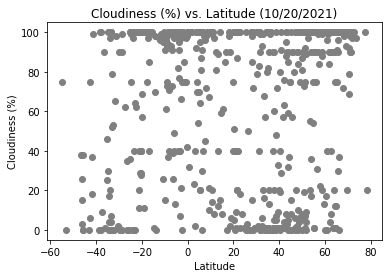

In [13]:
plt.scatter(x=df[lat],y=df[c], color='gray')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("Cloudiness (%) vs. Latitude (10/20/2021)")
plt.show()

Humidity (%) vs. Latitude

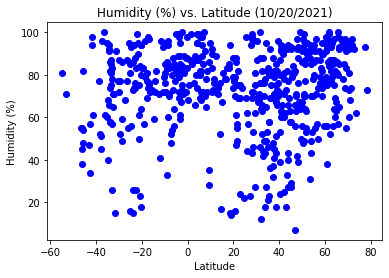

In [14]:
plt.scatter(x=df[lat],y=df[h], color='blue')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("Humidity (%) vs. Latitude (10/20/2021)")
plt.show()

Wind Speed (mph) vs. Latitude

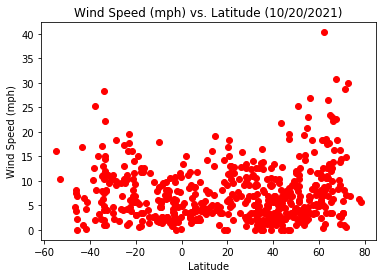

In [15]:
plt.scatter(x=df[lat],y=df[w], color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("Wind Speed (mph) vs. Latitude (10/20/2021)")
plt.show()

Max Temperature (F) vs. Latitude

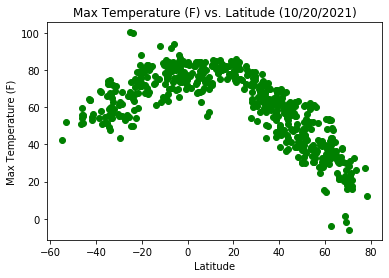

In [16]:
plt.scatter(x=df[lat],y=df[maxt], color="green")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("Max Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

Min Temperature (F) vs. Latitude

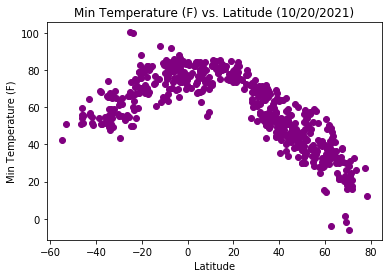

In [17]:
plt.scatter(x=df[lat],y=df[mint], color="purple")
plt.ylabel("Min Temperature (F)")
plt.xlabel("Latitude")
plt.title("Min Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

"Real Feel" Temperature (F) vs. Latitude

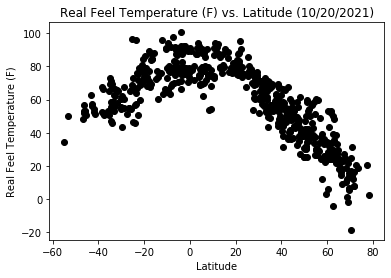

In [18]:
plt.scatter(x=df[lat],y=df[rft], color="black")
plt.ylabel("Real Feel Temperature (F)")
plt.xlabel("Latitude")
plt.title("Real Feel Temperature (F) vs. Latitude (10/20/2021)")
plt.show()

Atmospheric pressure vs. Latitude

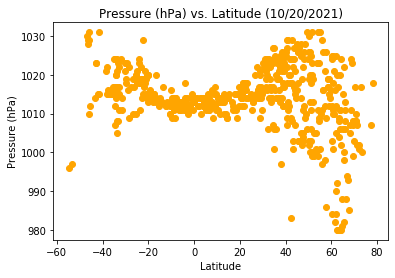

In [19]:
plt.scatter(x=df[lat],y=df[p], color="orange")
plt.ylabel("Pressure (hPa)")
plt.xlabel("Latitude")
plt.title("Pressure (hPa) vs. Latitude (10/20/2021)")
plt.show()

----------------

Created scatterplots using seaborn and seaborn to evaluate the following relationships:

* Cloudiness (%) vs. Latitude
* Humidity (%) vs. Latitude
* Wind Speed (mph) vs. Latitude
* Max Temperature (F) vs. Latitude
* Min Temperature (F) vs. Latitude
* "Real Feel" Temperature (F) vs. Latitude
* Atmospheric pressure vs. Latitude

In [20]:
import seaborn as sns

Cloudiness (%) vs. Latitude

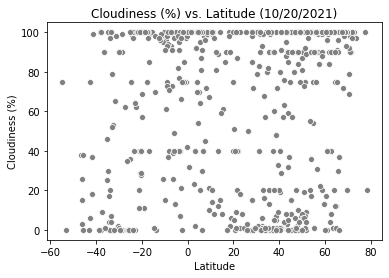

In [21]:
ax = sns.scatterplot(x=lat, y=c, data=df, color="gray")
ax.set_title("Cloudiness (%) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
plt.show()

Humidity (%) vs. Latitude

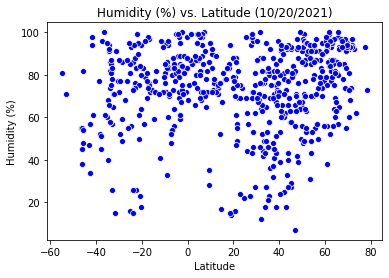

In [22]:
ax = sns.scatterplot(x=lat, y=h, data=df, color="blue")
ax.set_title("Humidity (%) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
plt.show()

Wind Speed (mph) vs. Latitude

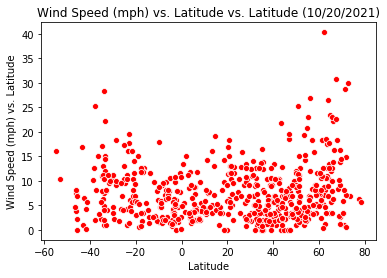

In [23]:
ax = sns.scatterplot(x=lat, y=w, data=df, color="red")
ax.set_title("Wind Speed (mph) vs. Latitude vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph) vs. Latitude")
plt.show()

Max Temperature (F) vs. Latitude

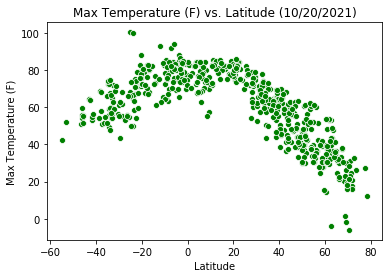

In [24]:
ax = sns.scatterplot(x=lat, y=maxt, data=df, color="green")
ax.set_title("Max Temperature (F) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
plt.show()

Pressure (hPa) vs. Latitude

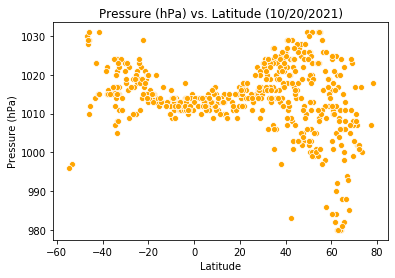

In [25]:
ax = sns.scatterplot(x=lat, y=p, data=df, color="orange")
ax.set_title("Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

## Advanced Analysis and Observed Trends

------------

### Observation 1: Temperature and Latitude correlation

One of the most obvious trends in the data is the relationship between maximum temperature and latitude.  Max temperature increases as latitude reaches 0° (the equator) and decreases as latitude approaches the poles (90°). This is further elucidated by the linear regression models of the Northern and Southern Hemispheres on the latitude vs. max temp graph.  Although a best fit regression line would be polynomial, for simplicity, the dataset was split into Northern and Southern Hemispheres to evaluate the correlation using a linear regression model across the two hemispheres.  **Northern hemisphere latitudes are highly negatively correlated (r = -0.8, p < 0.01, depending on cities in the API call), meaning that as you move north (higher latitudes) there is a decrease in temperature. The same relationship exists for the Southern hemisphere, with a moderate positive correlation (r = 0.6, p < 0.01, depending on cities in the API call), meaning as latitude approaches the south pole the temperature decreases.**  The interpretation is slightly different for Southern hemisphere because latitudes are negative (latitude decreases as you move to the south pole and temperature decreases, creating a positive relationship).  

See the linear regressions on the graph below as well as the statistical output for the Pearson correlation coefficient (and it's p-value that tests for non-correlation).

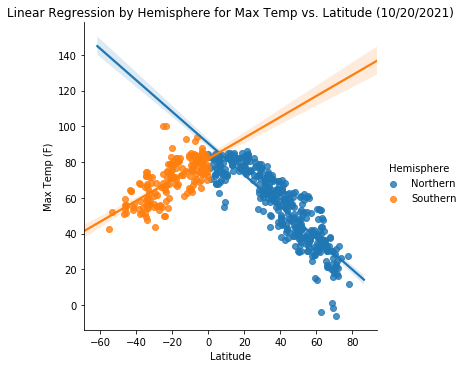

In [29]:
#correlation


sns.lmplot(x="Lat", y="Max Temp", hue="Hemisphere", data=city_weather_df)

ax = plt.gca()

ax.set_title("Linear Regression by Hemisphere for Max Temp vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temp (F)")

plt.show()

In [28]:
from scipy import stats

northern_df = city_weather_df[city_weather_df["Hemisphere"] == "Northern"]
southern_df = city_weather_df[city_weather_df["Hemisphere"] == "Southern"]

print("NOTE: the output here may differ with each API call")
#Northern Hemisphere correlation
print("Northern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(northern_df['Lat'], northern_df['Max Temp']))
#Southern Hemisphere correlation
print("Southern Hemisphere Max Temp and Latitude correlation statistics: ",
      stats.pearsonr(southern_df['Lat'], southern_df['Max Temp']))   



NOTE: the output here may differ with each API call
Northern Hemisphere Max Temp and Latitude correlation statistics:  (-0.8620269786000098, 2.245796244156527e-115)
Southern Hemisphere Max Temp and Latitude correlation statistics:  (0.6169146967697625, 7.751293019032125e-20)


### Observation 2: Equatorial Pressure and Latitude

The relationship of pressure and latitude was obscured by *subpolar* and *polar* regions; as these regions see greater variation in pressure across cities in those latitudes.  However, by splitting the the points into regions, the green center, representing the *equatorial* region, is highlighted as a tight cluster of points within a similar pressure range.  **The data suggests that atmospheric pressure in the equatorial region remains similar, expecially when compared to other regions globally.**  However, it is worth noting that the pattern may only hold seasonally, as the time of the data pull coincides with the tropical doldrums - when cloud cover is higher and the winds are lower, creating a lower pressure area.


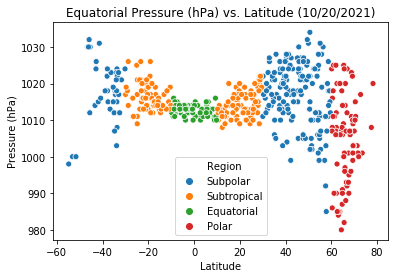

In [35]:

ax = sns.scatterplot(x="Lat", y="Pressure", data=city_weather_df3, hue="Region")
ax.set_title("Equatorial Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

### Observation 3: High Variablity across Wind Speed, Cloudiness, and Humidity

There doesn't appear to be any pattern or relationship of wind speed, cloudiness, or humidity across latitudes.  The data were sliced into regions (color-coded), but no additional patterns emerged.  There may be too much variability across the cities, such as elevation, proximity to waterbodies, and microclimates, to see any patterns.  Season may also play a role, as the seasons are opposite between northern and southern hemispheres.  A more in-depth analysis may be needed to disern additional patterns in these environmental variables.


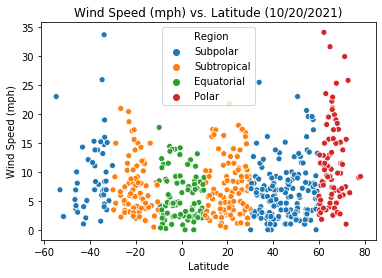

In [42]:

ax = sns.scatterplot(x="Lat", y="Wind Speed", data=city_weather_df3, hue="Region")
ax.set_title("Wind Speed (mph) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
plt.show()

In [ ]:
ax = sns.scatterplot(x=lat, y=p, data=df, hue="Region2")
ax.set_title("Equatorial Pressure (hPa) vs. Latitude (10/20/2021)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Pressure (hPa)")
plt.show()

In [ ]:
sns.lmplot(x=p, y=w, data=df, hue="Region")
#ax = sns.scatterplot(x=p, y=maxt, data=df, color="pink")
ax.set_title("Max Temp (F) vs. Pressure (hPa) (10/20/2021)")
ax.set_xlabel("Pressure (hPa)")
ax.set_ylabel("Max Temp (F)")
plt.show()

A 3D graphic was created using Latitude, Pressure and Max Temp, however, no additional patterns emerged.

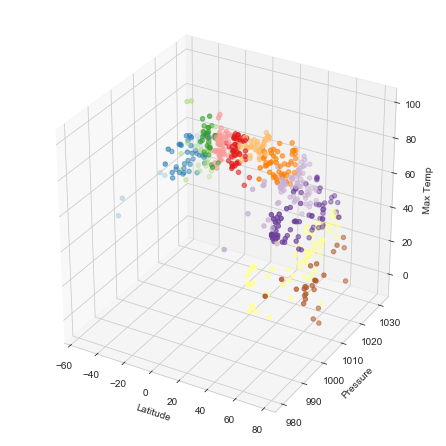

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = city_weather_df['Lat']
y = city_weather_df['Pressure']
z = city_weather_df['Max Temp']

g = ax.scatter(x, y, z, c=x, marker='o', depthshade=True, cmap='Paired')
ax.set_xlabel('Latitude')
ax.set_ylabel('Pressure')
ax.set_zlabel('Max Temp')

plt.show()


Please note:  The data are output throughout the code, and are saved as city_output.txt (the list of cities pulled from citipy) and city_weather.csv, as the csv output of the final dataframe.